# State by State Time Series Visualizations 

## Avg Ad Airings (7DMA) | State Polls | % Neg Ad Mix (7DMA)

### By State and Party

In [1]:
import pprint
import pickle
import pandas as pd
from datetime import datetime
import numpy as np
import string
from collections import Counter
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 2000)
pd.set_option("display.precision", 2)

In [2]:
plt.style.use('fivethirtyeight')

## Reading in Pickled DataFrame with State Daily Ad Counts by Party - 7DMA

- see `State_Daily_Ad_Counts_by_Party_7DMA` notebook to see how DataFrame was constructed

In [3]:
state_party_df = pd.read_pickle('data/state_party_ad_counts_7DMA.pickle')
state_party_df.head()

,AZ_D,AZ_R,CO_D,CO_R,FL_D,FL_R,IA_D,IA_R,NC_D,NC_R,NH_D,NH_R,NV_D,NV_R,National_D,National_R,OH_D,OH_R,PA_D,PA_R,VA_D,VA_R,WI_D,WI_R
start_time,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
state_party_df.shape

(100, 24)

## Reading in State Polls Data

- to be joined with `state_party_df`
- will harmonize dates as polls data recorded on a weekly basis
- will then use `.ffill()` to fill in missing values for charting purposes

In [5]:
state_polls = pd.read_csv('data/rcp_state_polls_amended.csv', parse_dates=['Date'], index_col='Date')
state_polls

,OH_Clinton,OH_Trump,FL_Clinton,FL_Trump,MI_Clinton,MI_Trump,WI_Clinton,WI_Trump,VA_Clinton,VA_Trump,NC_Clinton,NC_Trump,CO_Clinton,CO_Trump,IA_Clinton,IA_Trump,NV_Clinton,NV_Trump,AZ_Clinton,AZ_Trump,PA_Clinton,PA_Trump,NH_Clinton,NH_Trump
Date,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-08,41.8,39.6,43.0,41.4,39.4,33.2,42.0,36.5,42.8,36.0,42.3,41.8,41.3,32.0,38.8,39.0,43.0,40.7,NaN,NaN,46.2,37.5,42.0,34.5
2016-08-15,41.8,39.6,44.2,40.2,40.0,33.0,44.0,35.0,46.0,35.7,43.0,41.8,42.0,30.7,38.7,38.7,43.3,41.0,NaN,NaN,46.2,37.5,43.0,35.0
2016-08-22,43.0,39.0,44.2,40.2,42.5,34.0,44.0,35.0,42.2,34.6,42.0,41.2,41.8,31.3,38.0,37.8,43.3,41.0,NaN,NaN,46.5,36.5,43.0,35.0
2016-08-29,43.0,39.8,44.3,40.7,43.4,34.8,44.0,35.0,45.5,34.0,42.8,41.5,41.8,31.3,38.0,37.8,43.3,41.0,40.0,42.7,46.6,39.0,43.0,35.0
2016-09-05,44.0,40.7,45.0,42.3,44.3,36.7,41.7,37.3,45.0,38.7,43.2,42.6,39.7,30.0,39.0,40.0,43.3,41.0,39.3,42.7,46.0,40.0,44.0,34.0
2016-09-12,42.0,41.0,43.2,43.4,44.7,38.7,42.0,38.0,44.7,38.7,43.0,42.3,40.3,35.0,38.3,40.3,42.8,41.2,38.2,40.4,45.6,39.8,41.3,35.3
2016-09-19,40.4,42.4,43.3,43.3,43.0,37.8,42.0,38.0,43.3,39.0,42.0,42.0,40.0,37.0,38.3,43.3,41.5,42.5,38.2,40.4,44.7,38.5,41.3,35.3
2016-09-26,40.7,42.7,43.8,43.3,43.3,39.0,43.0,38.0,43.0,37.0,42.3,43.1,40.5,41.0,37.8,42.8,40.5,42.8,39.0,42.0,43.6,41.8,42.7,37.3


In [6]:
state_polls.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2016-08-01 to 2016-11-08
Data columns (total 24 columns):
OH_Clinton    16 non-null float64
OH_Trump      16 non-null float64
FL_Clinton    16 non-null float64
FL_Trump      16 non-null float64
MI_Clinton    16 non-null float64
MI_Trump      16 non-null float64
WI_Clinton    16 non-null float64
WI_Trump      16 non-null float64
VA_Clinton    16 non-null float64
VA_Trump      16 non-null float64
NC_Clinton    15 non-null float64
NC_Trump      15 non-null float64
CO_Clinton    16 non-null float64
CO_Trump      16 non-null float64
IA_Clinton    16 non-null float64
IA_Trump      16 non-null float64
NV_Clinton    16 non-null float64
NV_Trump      16 non-null float64
AZ_Clinton    12 non-null float64
AZ_Trump      12 non-null float64
PA_Clinton    16 non-null float64
PA_Trump      16 non-null float64
NH_Clinton    15 non-null float64
NH_Trump      15 non-null float64
dtypes: float64(24)
memory usage: 3.1 KB


In [7]:
state_polls.shape

(16, 24)

## `join`ing `state_party_df` with `state_polls`

In [8]:
state_combo = state_party_df.join(state_polls, how='outer')
state_combo.head(20)

,AZ_D,AZ_R,CO_D,CO_R,FL_D,FL_R,IA_D,IA_R,NC_D,NC_R,NH_D,NH_R,NV_D,NV_R,National_D,National_R,OH_D,OH_R,PA_D,PA_R,VA_D,VA_R,WI_D,WI_R,OH_Clinton,OH_Trump,FL_Clinton,FL_Trump,MI_Clinton,MI_Trump,WI_Clinton,WI_Trump,VA_Clinton,VA_Trump,NC_Clinton,NC_Trump,CO_Clinton,CO_Trump,IA_Clinton,IA_Trump,NV_Clinton,NV_Trump,AZ_Clinton,AZ_Trump,PA_Clinton,PA_Trump,NH_Clinton,NH_Trump
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-07,0.00,0.00,0.29,0.00,3.71,0.00,0.0,0.0,3.71,0.00,1.29,0.00,6.29,0.14,11.00,13.29,0.71,0.00,42.14,2.86,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-08,0.71,0.00,0.43,0.29,9.14,2.86,0.0,0.0,8.14,1.43,2.14,0.00,11.43,0.14,13.14,15.71,9.29,3.71,46.29,2.14,0.00,0.00,0.43,0.00,41.8,39.6,43.0,41.4,39.4,33.2,42.0,36.5,42.8,36.0,42.3,41.8,41.3,32.0,38.8,39.0,43.0,40.7,NaN,NaN,46.2,37.5,42.0,34.5
2016-08-09,1.14,0.14,0.71,0.57,16.86,5.00,0.0,0.0,11.57,3.86,3.86,0.14,21.29,0.43,16.43,17.71,20.86,8.43,48.43,1.71,0.00,0.00,0.71,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-10,1.57,0.14,1.14,0.57,24.14,6.86,0.0,0.0,15.14,6.29,4.86,0.14,29.86,0.43,27.57,17.43,30.71,12.29,50.29,1.14,0.00,0.00,1.14,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
state_combo.shape

(100, 48)

In [10]:
# Need to forward fill state polls as data by week, versus ad data was daily

state_polls.columns.tolist()

['OH_Clinton',
 'OH_Trump',
 'FL_Clinton',
 'FL_Trump',
 'MI_Clinton',
 'MI_Trump',
 'WI_Clinton',
 'WI_Trump',
 'VA_Clinton',
 'VA_Trump',
 'NC_Clinton',
 'NC_Trump',
 'CO_Clinton',
 'CO_Trump',
 'IA_Clinton',
 'IA_Trump',
 'NV_Clinton',
 'NV_Trump',
 'AZ_Clinton',
 'AZ_Trump',
 'PA_Clinton',
 'PA_Trump',
 'NH_Clinton',
 'NH_Trump']

In [11]:
# use a for loop to automate the .ffill()

for label in state_polls.columns.tolist():
    state_combo[label] = state_combo[label].ffill()

In [12]:
state_combo.head(20)

,AZ_D,AZ_R,CO_D,CO_R,FL_D,FL_R,IA_D,IA_R,NC_D,NC_R,NH_D,NH_R,NV_D,NV_R,National_D,National_R,OH_D,OH_R,PA_D,PA_R,VA_D,VA_R,WI_D,WI_R,OH_Clinton,OH_Trump,FL_Clinton,FL_Trump,MI_Clinton,MI_Trump,WI_Clinton,WI_Trump,VA_Clinton,VA_Trump,NC_Clinton,NC_Trump,CO_Clinton,CO_Trump,IA_Clinton,IA_Trump,NV_Clinton,NV_Trump,AZ_Clinton,AZ_Trump,PA_Clinton,PA_Trump,NH_Clinton,NH_Trump
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-07,0.00,0.00,0.29,0.00,3.71,0.00,0.0,0.0,3.71,0.00,1.29,0.00,6.29,0.14,11.00,13.29,0.71,0.00,42.14,2.86,0.00,0.00,0.00,0.00,40.0,38.6,41.3,41.5,37.7,34.0,42.0,36.5,40.7,35.7,NaN,NaN,40.8,33.5,39.3,39.5,43.0,40.5,NaN,NaN,42.0,38.8,NaN,NaN
2016-08-08,0.71,0.00,0.43,0.29,9.14,2.86,0.0,0.0,8.14,1.43,2.14,0.00,11.43,0.14,13.14,15.71,9.29,3.71,46.29,2.14,0.00,0.00,0.43,0.00,41.8,39.6,43.0,41.4,39.4,33.2,42.0,36.5,42.8,36.0,42.3,41.8,41.3,32.0,38.8,39.0,43.0,40.7,NaN,NaN,46.2,37.5,42.0,34.5
2016-08-09,1.14,0.14,0.71,0.57,16.86,5.00,0.0,0.0,11.57,3.86,3.86,0.14,21.29,0.43,16.43,17.71,20.86,8.43,48.43,1.71,0.00,0.00,0.71,0.00,41.8,39.6,43.0,41.4,39.4,33.2,42.0,36.5,42.8,36.0,42.3,41.8,41.3,32.0,38.8,39.0,43.0,40.7,NaN,NaN,46.2,37.5,42.0,34.5
2016-08-10,1.57,0.14,1.14,0.57,24.14,6.86,0.0,0.0,15.14,6.29,4.86,0.14,29.86,0.43,27.57,17.43,30.71,12.29,50.29,1.14,0.00,0.00,1.14,0.00,41.8,39.6,43.0,41.4,39.4,33.2,42.0,36.5,42.8,36.0,42.3,41.8,41.3,32.0,38.8,39.0,43.0,40.7,NaN,NaN,46.2,37.5,42.0,34.5


## Reading in Pickled DataFrame with State Daily Ad Mix by Party - 7DMA

- see `State_Daily_Ad_Mix_by_Party_7DMA` notebook to see how DataFrame was constructed

In [13]:
# could have joined the columns needed from this DataFrame to the one created above to have one convenient DF, but
# decided to leave as a separate DF for simplicity as can plot the required columns without joining -- keeping it simple

state_comb2 = pd.read_pickle('data/state_party_neg_ad_mix_7DMA.pickle')
state_comb2.head(20)

,AZ_D_con,AZ_D_neg_ratio,AZ_D_tot,AZ_R_con,AZ_R_neg_ratio,AZ_R_tot,CO_D_con,CO_D_neg_ratio,CO_D_tot,CO_R_con,CO_R_neg_ratio,CO_R_tot,FL_D_con,FL_D_neg_ratio,FL_D_tot,FL_R_con,FL_R_neg_ratio,FL_R_tot,IA_D_con,IA_D_neg_ratio,IA_D_tot,IA_R_con,IA_R_neg_ratio,IA_R_tot,NC_D_con,NC_D_neg_ratio,NC_D_tot,NC_R_con,NC_R_neg_ratio,NC_R_tot,NH_D_con,NH_D_neg_ratio,NH_D_tot,NH_R_con,NH_R_neg_ratio,NH_R_tot,NV_D_con,NV_D_neg_ratio,NV_D_tot,NV_R_con,NV_R_neg_ratio,NV_R_tot,National_D_con,National_D_neg_ratio,National_D_tot,National_R_con,National_R_neg_ratio,National_R_tot,OH_D_con,OH_D_neg_ratio,OH_D_tot,OH_R_con,OH_R_neg_ratio,OH_R_tot,PA_D_con,PA_D_neg_ratio,PA_D_tot,PA_R_con,PA_R_neg_ratio,PA_R_tot,VA_D_con,VA_D_neg_ratio,VA_D_tot,VA_R_con,VA_R_neg_ratio,VA_R_tot,WI_D_con,WI_D_neg_ratio,WI_D_tot,WI_R_con,WI_R_neg_ratio,WI_R_tot
start_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-07,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.29,0.0,0.0,0.00,2.86,24.49,3.71,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.43,40.48,3.71,0.00,0.00,0.00,1.00,38.10,1.29,0.0,0.0,0.00,4.57,49.18,6.29,0.14,14.29,0.14,6.29,55.19,11.00,12.29,92.28,13.29,0.71,14.29,0.71,0.00,0.00,0.00,27.29,66.91,42.14,2.57,66.19,2.86,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00
2016-08-08,0.57,11.43,0.71,0.0,0.0,0.00,0.14,14.29,0.43,0.0,0.0,0.29,6.57,34.26,9.14,2.14,10.71,2.86,0.0,0.0,0.0,0.0,0.0,0.0,7.14,52.46,8.14,1.00,10.00,1.43,1.57,47.62,2.14,0.0,0.0,0.00,8.57,60.29,11.43,0.14,14.29,0.14,8.29,62.89,13.14,11.71,85.04,15.71,8.00,26.43,9.29,3.14,12.09,3.71,32.00,76.94,46.29,1.86,54.29,2.14,0.00,0.00,0.00,0.0,0.0,0.00,0.29,9.52,0.43,0.0,0.0,0.00
2016-08-09,0.71,16.19,1.14,0.0,0.0,0.14,0.14,14.29,0.71,0.0,0.0,0.57,11.57,43.52,16.86,4.29,25.00,5.00,0.0,0.0,0.0,0.0,0.0,0.0,9.71,63.17,11.57,2.57,19.24,3.86,3.00,59.52,3.86,0.0,0.0,0.14,15.71,70.65,21.29,0.14,14.29,0.43,11.57,66.81,16.43,11.71,79.75,17.71,17.29,37.89,20.86,7.14,24.21,8.43,33.86,77.86,48.43,1.29,42.86,1.71,0.00,0.00,0.00,0.0,0.0,0.00,0.43,16.67,0.71,0.0,0.0,0.00


## Ohio

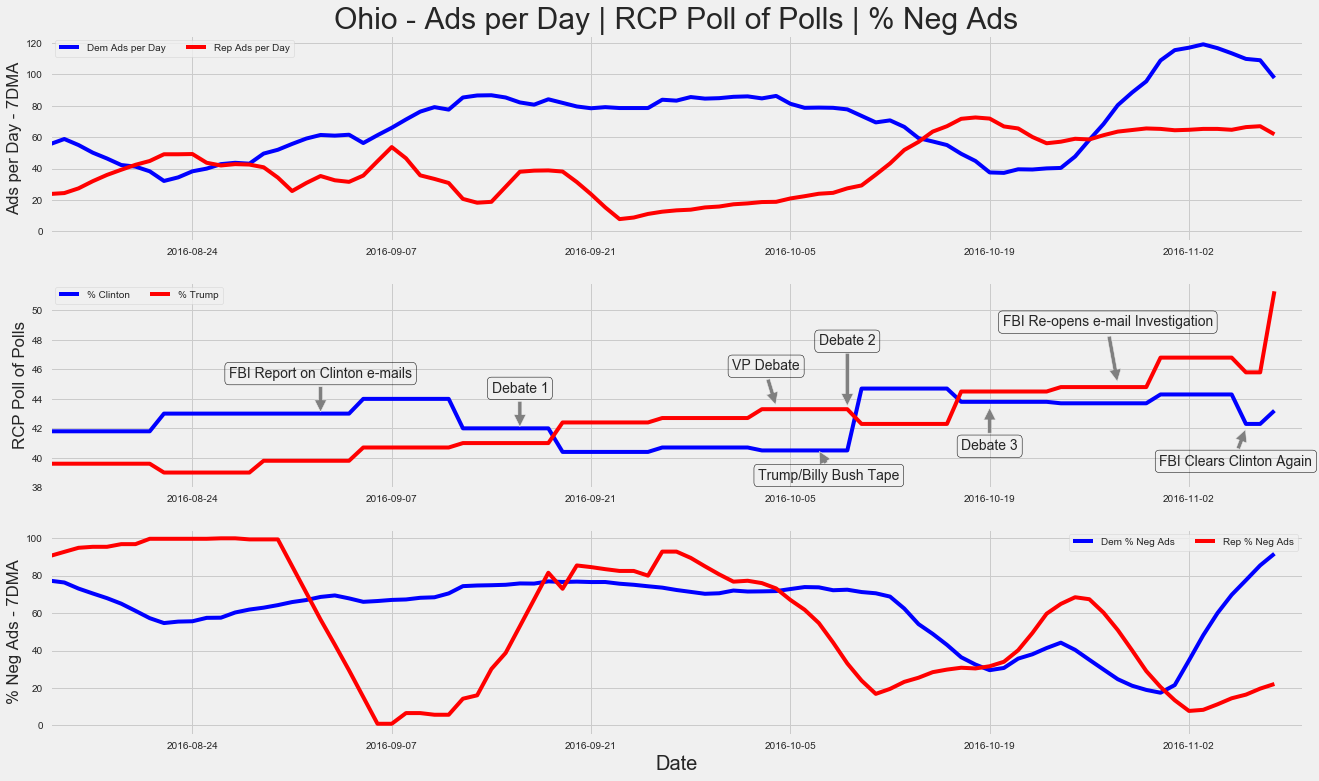

In [17]:
# Ohio Plots

fig, ax = plt.subplots(3, figsize=(20, 12)) # sets up for 3 plots in 1 big plots

# Top Plot - Ads per Day - 7DMA

ax[0].plot(state_combo['OH_D'].index, state_combo['OH_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['OH_R'].index, state_combo['OH_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # harmonize start and end dates with other plots
ax[0].set_ylabel('Ads per Day - 7DMA')

# Middle Plot - Poll Time Series Data

ax[1].plot(state_combo['OH_Clinton'].index, state_combo['OH_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['OH_Trump'].index, state_combo['OH_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # harmonize start and end dates with other plots
ax[1].set_ylabel('RCP Poll of Polls')

# Bottom Plot - % Negative Ads - 7DMA

ax[2].plot(state_comb2['OH_D_neg_ratio'].index, state_comb2['OH_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['OH_R_neg_ratio'].index, state_comb2['OH_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # harmonize start and end dates with other plots
ax[2].set_ylabel('% Neg Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), 42),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))
ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), 43.5),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 65),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))
ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), 43.5),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))
ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), 43.5),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))
ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), 43),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))
ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), 40.5),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, -25),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))
ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), 45),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 55),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))
ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), 42),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -40),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends for all 3 subplots
ax[0].legend(frameon=True, loc='best', ncol=2)
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Ohio - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/ohio.png')

## Arizona

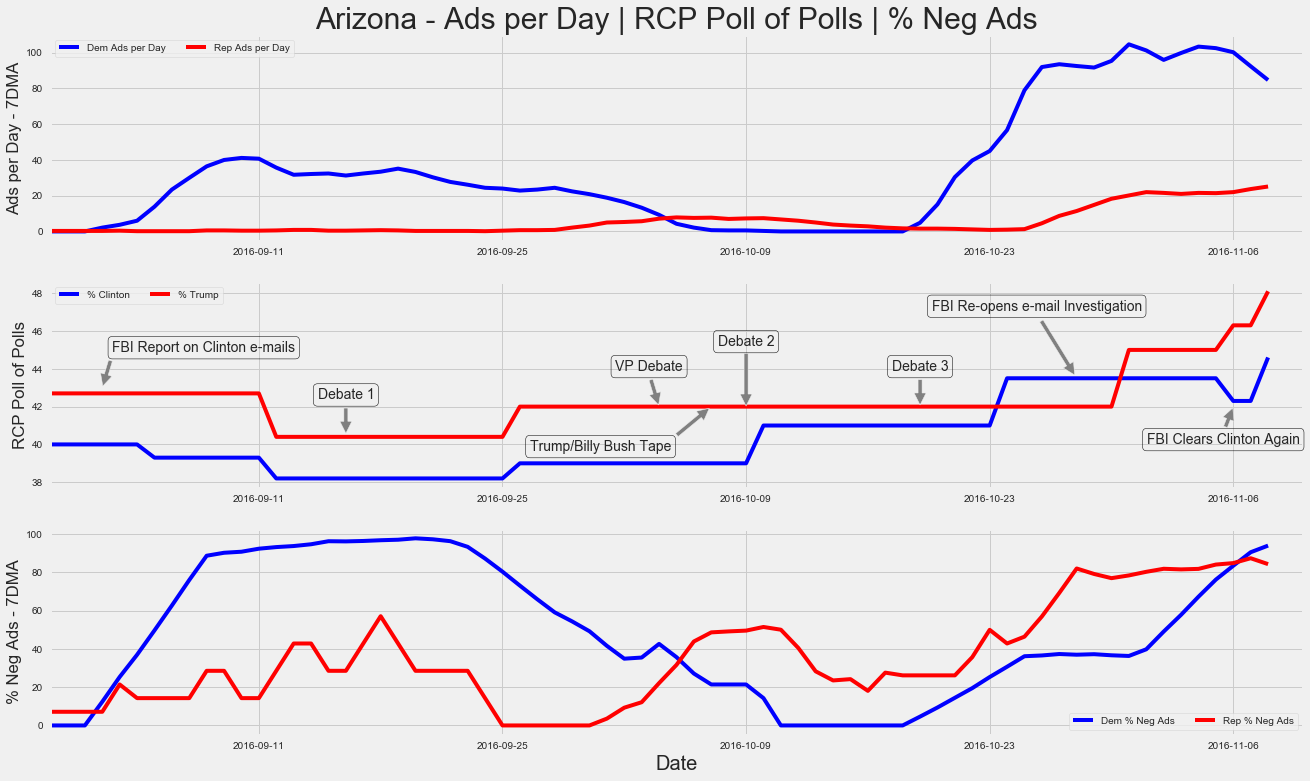

In [19]:
# Arizona Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['AZ_D'].index, state_combo['AZ_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['AZ_R'].index, state_combo['AZ_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 30), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')

ax[1].plot(state_combo['AZ_Clinton'].index, state_combo['AZ_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['AZ_Trump'].index, state_combo['AZ_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 30), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['AZ_D_neg_ratio'].index, state_comb2['AZ_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['AZ_R_neg_ratio'].index, state_comb2['AZ_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 30), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Neg Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)


# Annotations of Key Dates

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), 40.5),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), 42),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 65),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), 42),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), 42),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), 43),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, 40),
               textcoords='offset points', ha='left', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), 42),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-40, -40),
               textcoords='offset points', ha='right', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), 43.5),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-40, 65),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), 42),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -40),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2)
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Arizona - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/arizona.png')

## Colorado

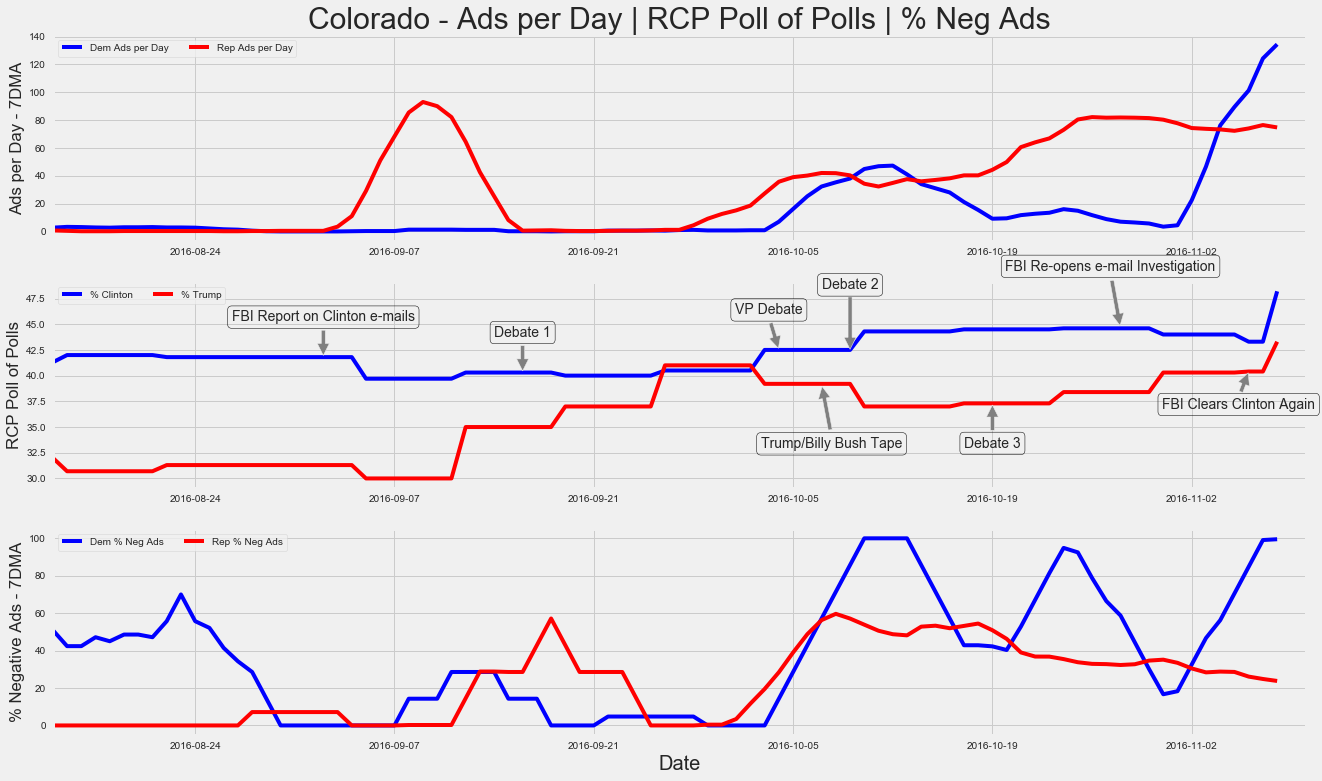

In [21]:
# Colorado Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['CO_D'].index, state_combo['CO_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['CO_R'].index, state_combo['CO_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')

ax[1].plot(state_combo['CO_Clinton'].index, state_combo['CO_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['CO_Trump'].index, state_combo['CO_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['CO_D_neg_ratio'].index, state_comb2['CO_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['CO_R_neg_ratio'].index, state_comb2['CO_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['CO_Clinton']['2016-9-2'],
                                             state_combo['CO_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['CO_Clinton']['2016-9-16'],
                                              state_combo['CO_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['CO_Clinton']['2016-10-4'],
                                              state_combo['CO_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['CO_Clinton']['2016-10-7'],
                                              state_combo['CO_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, -60),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['CO_Clinton']['2016-10-9'],
                                              state_combo['CO_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 65),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['CO_Clinton']['2016-10-19'],
                                               state_combo['CO_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['CO_Clinton']['2016-10-28'],
                                               state_combo['CO_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 55),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['CO_Clinton']['2016-11-6'],
                                              state_combo['CO_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -40),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2)
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Colorado - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/colorado.png')

## Florida

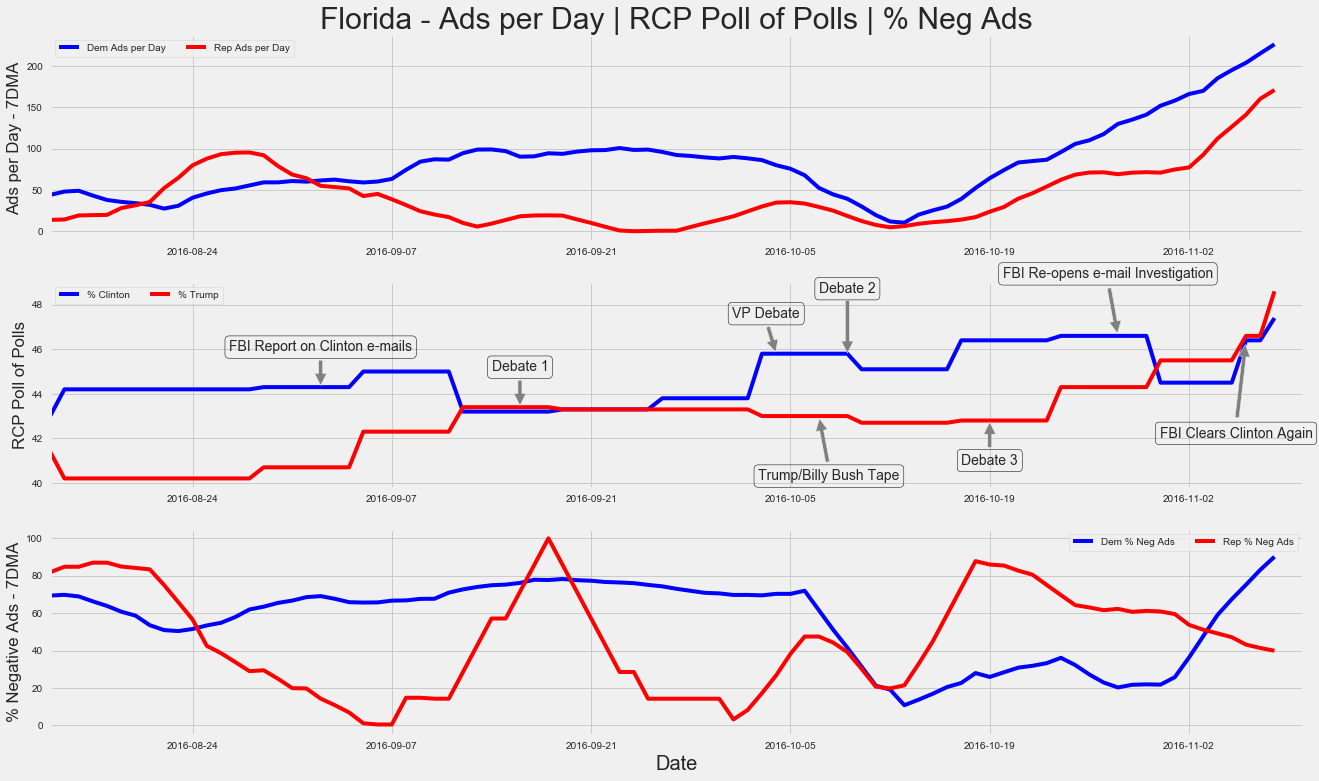

In [23]:
# Florida Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['FL_D'].index, state_combo['FL_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['FL_R'].index, state_combo['FL_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')
#plt.setp(ax[0].get_xticklabels(), visible=False) # removes the xlabels from this axis (upper)

ax[1].plot(state_combo['FL_Clinton'].index, state_combo['FL_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['FL_Trump'].index, state_combo['FL_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')


ax[2].plot(state_comb2['FL_D_neg_ratio'].index, state_comb2['FL_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['FL_R_neg_ratio'].index, state_comb2['FL_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['FL_Clinton']['2016-9-2'],
                                             state_combo['FL_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['FL_Clinton']['2016-9-16'],
                                              state_combo['FL_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['FL_Clinton']['2016-10-4'],
                                              state_combo['FL_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['FL_Clinton']['2016-10-7'],
                                              state_combo['FL_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, -60),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['FL_Clinton']['2016-10-9'],
                                              state_combo['FL_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 65),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['FL_Clinton']['2016-10-19'],
                                               state_combo['FL_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['FL_Clinton']['2016-10-28'],
                                               state_combo['FL_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 55),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['FL_Clinton']['2016-11-6'],
                                              state_combo['FL_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -100),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2)
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Florida - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/florida.png')

## Iowa

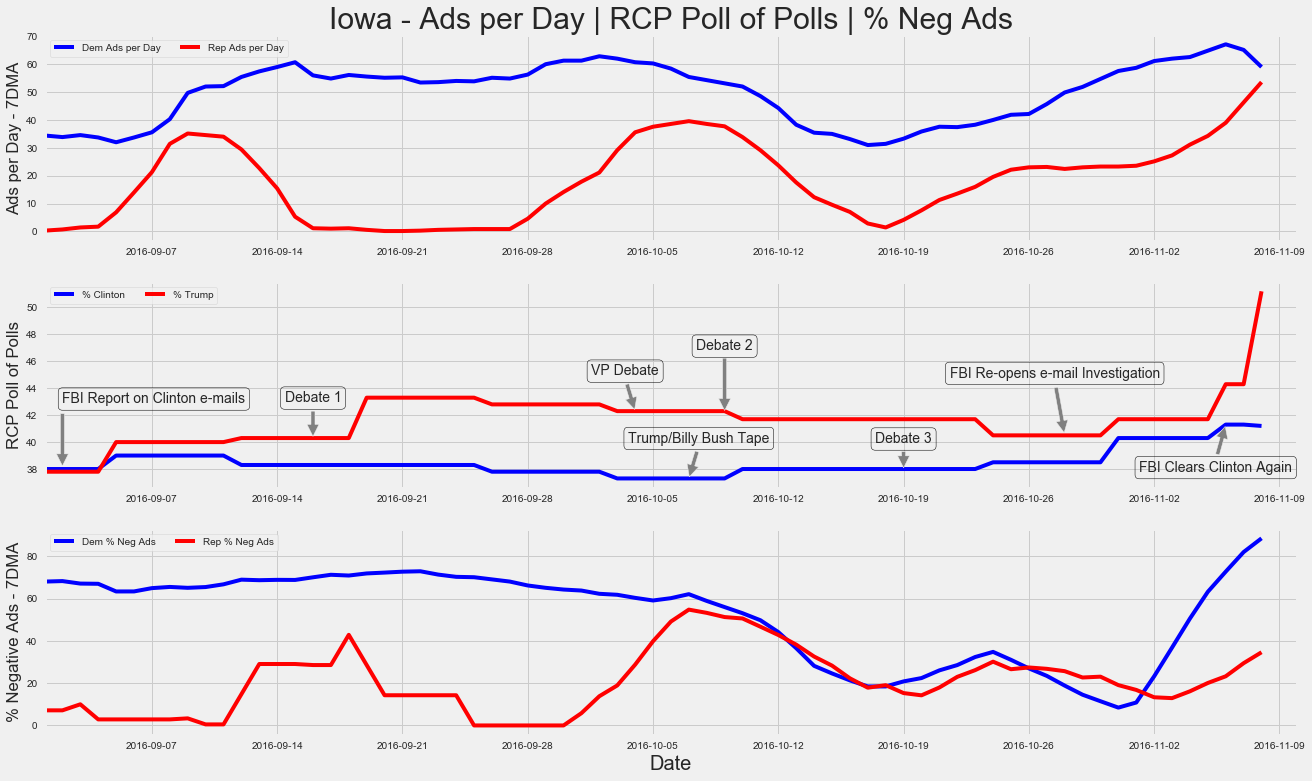

In [25]:
# Iowa Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['IA_D'].index, state_combo['IA_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['IA_R'].index, state_combo['IA_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 9, 1), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')
#plt.setp(ax[0].get_xticklabels(), visible=False) # removes the xlabels from this axis (upper)

ax[1].plot(state_combo['IA_Clinton'].index, state_combo['IA_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['IA_Trump'].index, state_combo['IA_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 9, 1), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['IA_D_neg_ratio'].index, state_comb2['IA_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['IA_R_neg_ratio'].index, state_comb2['IA_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 9, 1), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['IA_Clinton']['2016-9-2'],
                                             state_combo['IA_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 70),
               textcoords='offset points', ha='left', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['IA_Clinton']['2016-9-16'],
                                              state_combo['IA_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['IA_Clinton']['2016-10-4'],
                                              state_combo['IA_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['IA_Clinton']['2016-10-7'],
                                              state_combo['IA_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['IA_Clinton']['2016-10-9'],
                                              state_combo['IA_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 65),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['IA_Clinton']['2016-10-19'],
                                               state_combo['IA_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['IA_Clinton']['2016-10-28'],
                                               state_combo['IA_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 55),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['IA_Clinton']['2016-11-6'],
                                              state_combo['IA_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -50),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2)
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Iowa - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/iowa.png')

## North Carolina

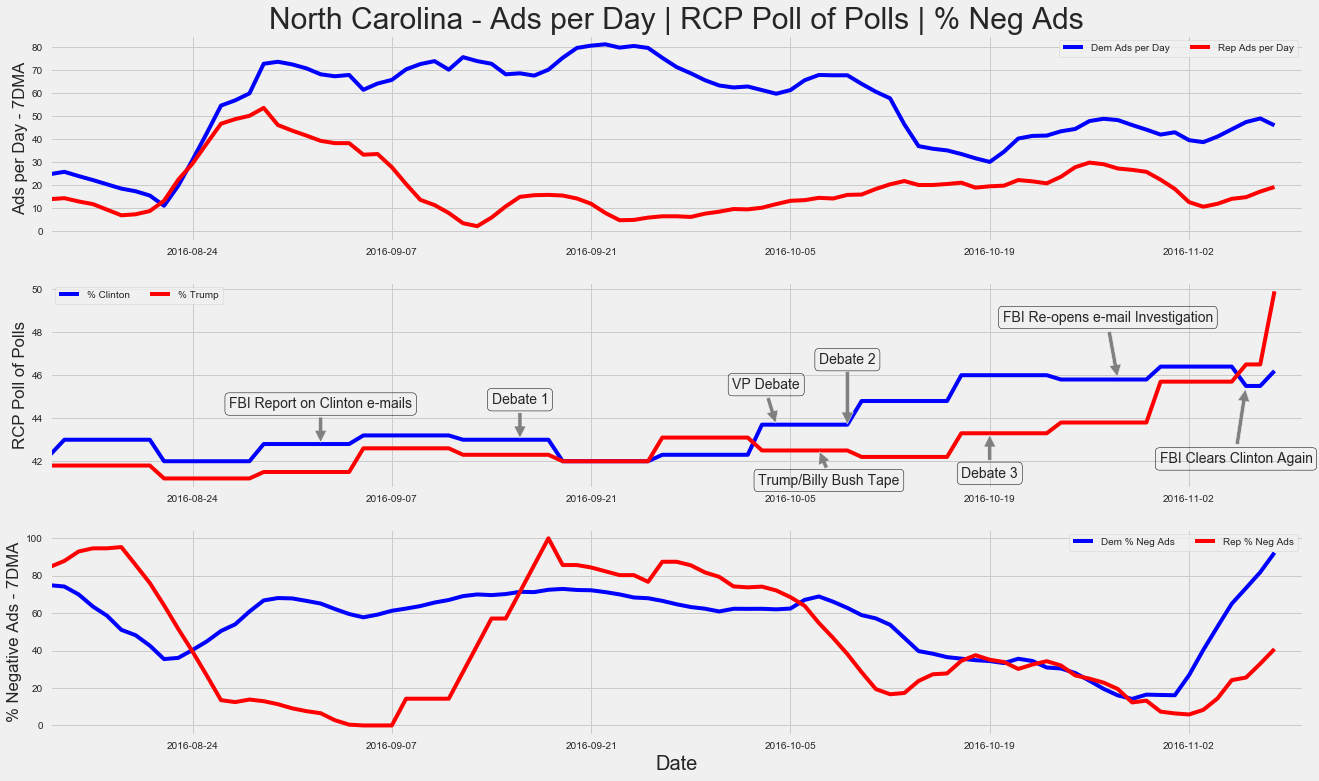

In [27]:
# North Carolina Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['NC_D'].index, state_combo['NC_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['NC_R'].index, state_combo['NC_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')
#plt.setp(ax[0].get_xticklabels(), visible=False) # removes the xlabels from this axis (upper)

ax[1].plot(state_combo['NC_Clinton'].index, state_combo['NC_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['NC_Trump'].index, state_combo['NC_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['NC_D_neg_ratio'].index, state_comb2['NC_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['NC_R_neg_ratio'].index, state_comb2['NC_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)


# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['NC_Clinton']['2016-9-2'],
                                             state_combo['NC_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['NC_Clinton']['2016-9-16'],
                                              state_combo['NC_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['NC_Clinton']['2016-10-4'],
                                              state_combo['NC_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['NC_Clinton']['2016-10-7'],
                                              state_combo['NC_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, -30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['NC_Clinton']['2016-10-9'],
                                              state_combo['NC_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 65),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['NC_Clinton']['2016-10-19'],
                                               state_combo['NC_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['NC_Clinton']['2016-10-28'],
                                               state_combo['NC_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 55),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['NC_Clinton']['2016-11-6'],
                                              state_combo['NC_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -80),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2) # this automatically places
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('North Carolina - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/north_carolina.png')

## Nevada

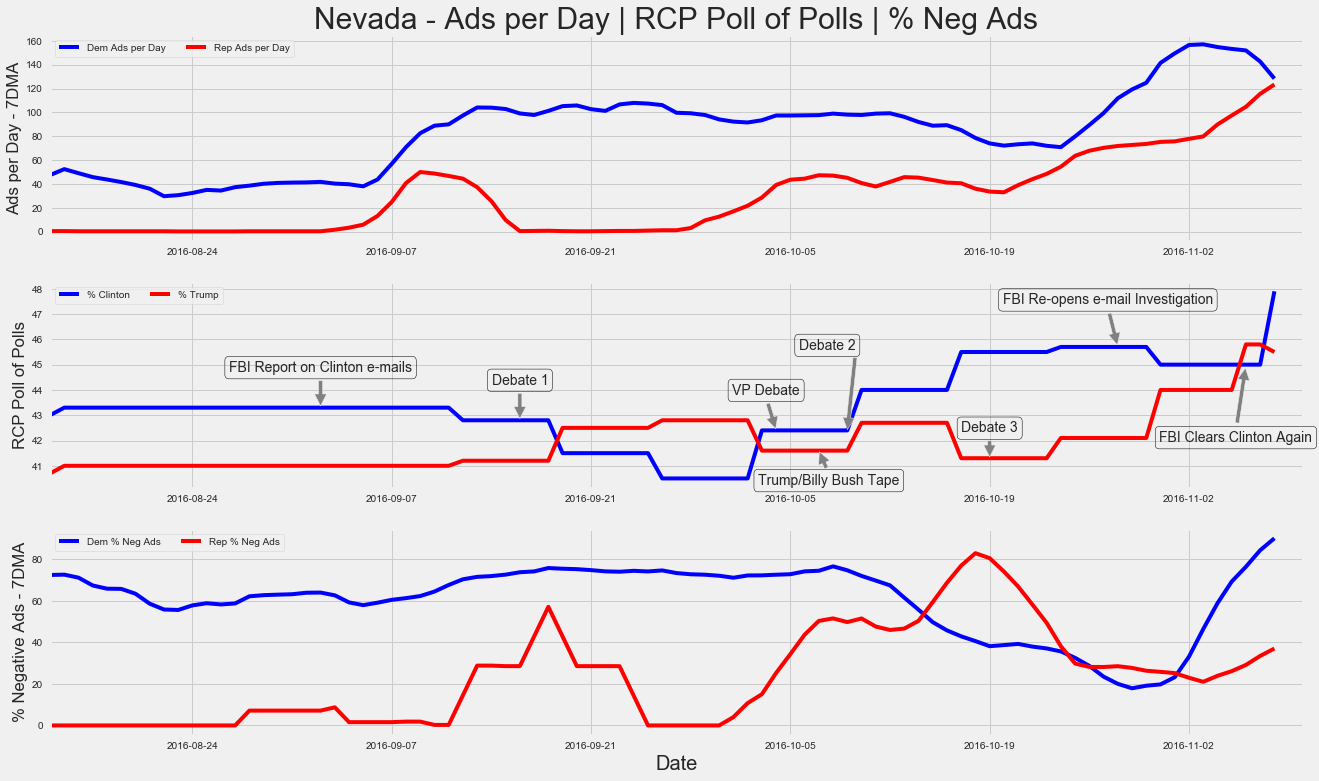

In [29]:
# Nevada Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['NV_D'].index, state_combo['NV_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['NV_R'].index, state_combo['NV_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')
#plt.setp(ax[0].get_xticklabels(), visible=False) # removes the xlabels from this axis (upper)

ax[1].plot(state_combo['NV_Clinton'].index, state_combo['NV_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['NV_Trump'].index, state_combo['NV_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['NV_D_neg_ratio'].index, state_comb2['NV_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['NV_R_neg_ratio'].index, state_comb2['NV_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['NV_Clinton']['2016-9-2'],
                                             state_combo['NV_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['NV_Clinton']['2016-9-16'],
                                              state_combo['NV_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['NV_Clinton']['2016-10-4'],
                                              state_combo['NV_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['NV_Clinton']['2016-10-7'],
                                              state_combo['NV_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, -30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['NV_Clinton']['2016-10-9'],
                                              state_combo['NV_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-20, 85),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['NV_Clinton']['2016-10-19'],
                                               state_combo['NV_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['NV_Clinton']['2016-10-28'],
                                               state_combo['NV_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['NV_Clinton']['2016-11-6'],
                                              state_combo['NV_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -80),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2) # this automatically places
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Nevada - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/nevada.png')

## Virginia

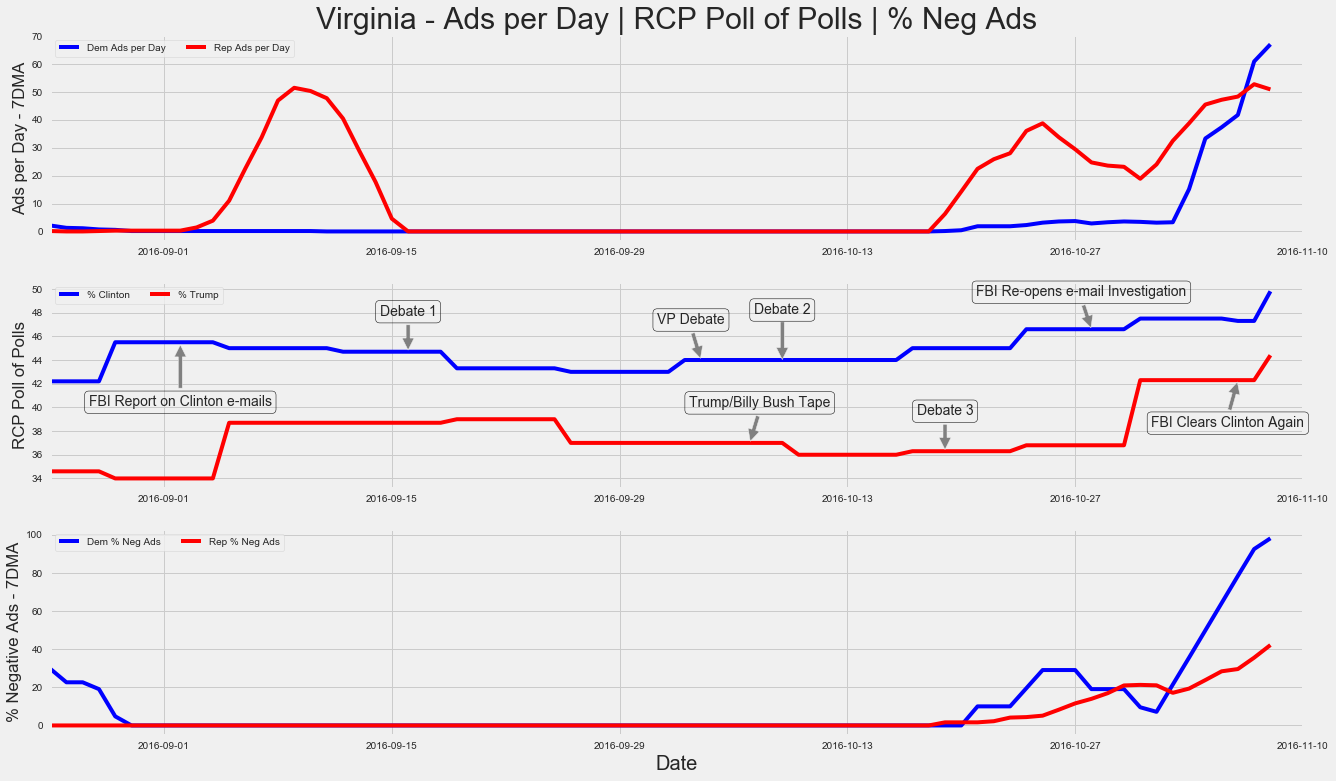

In [31]:
# Virgina Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['VA_D'].index, state_combo['VA_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['VA_R'].index, state_combo['VA_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 25), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')
#plt.setp(ax[0].get_xticklabels(), visible=False) # removes the xlabels from this axis (upper)

ax[1].plot(state_combo['VA_Clinton'].index, state_combo['VA_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['VA_Trump'].index, state_combo['VA_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 25), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['VA_D_neg_ratio'].index, state_comb2['VA_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['VA_R_neg_ratio'].index, state_comb2['VA_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 25), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['VA_Clinton']['2016-9-2'],
                                             state_combo['VA_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -60),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['VA_Clinton']['2016-9-16'],
                                              state_combo['VA_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['VA_Clinton']['2016-10-4'],
                                              state_combo['VA_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['VA_Clinton']['2016-10-7'],
                                              state_combo['VA_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['VA_Clinton']['2016-10-9'],
                                              state_combo['VA_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 50),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['VA_Clinton']['2016-10-19'],
                                               state_combo['VA_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['VA_Clinton']['2016-10-28'],
                                               state_combo['VA_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 30),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['VA_Clinton']['2016-11-6'],
                                              state_combo['VA_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -50),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2) # this automatically places
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Virginia - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/virgina.png')

## Wisconsin

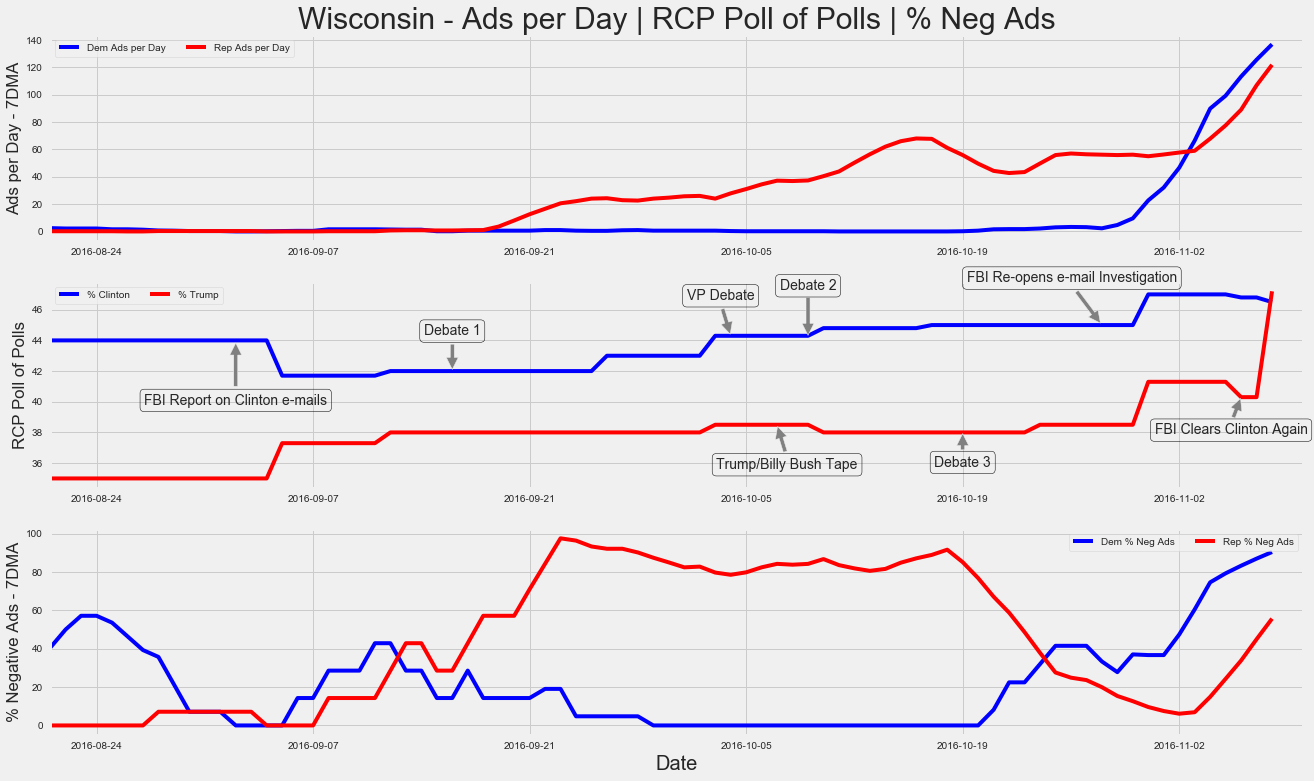

In [33]:
# Wisconsin Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['WI_D'].index, state_combo['WI_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['WI_R'].index, state_combo['WI_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 21), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')
#plt.setp(ax[0].get_xticklabels(), visible=False) # removes the xlabels from this axis (upper)

ax[1].plot(state_combo['WI_Clinton'].index, state_combo['WI_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['WI_Trump'].index, state_combo['WI_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 21), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['WI_D_neg_ratio'].index, state_comb2['WI_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['WI_R_neg_ratio'].index, state_comb2['WI_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 21), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['WI_Clinton']['2016-9-2'],
                                             state_combo['WI_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -60),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['WI_Clinton']['2016-9-16'],
                                              state_combo['WI_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['WI_Clinton']['2016-10-4'],
                                              state_combo['WI_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['WI_Clinton']['2016-10-7'],
                                              state_combo['WI_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(10, -40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['WI_Clinton']['2016-10-9'],
                                              state_combo['WI_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 50),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['WI_Clinton']['2016-10-19'],
                                               state_combo['WI_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['WI_Clinton']['2016-10-28'],
                                               state_combo['WI_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-30, 40),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['WI_Clinton']['2016-11-6'],
                                              state_combo['WI_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -40),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2) # this automatically places
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Wisconsin - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/wisconsin.png')

## Pennsylvania

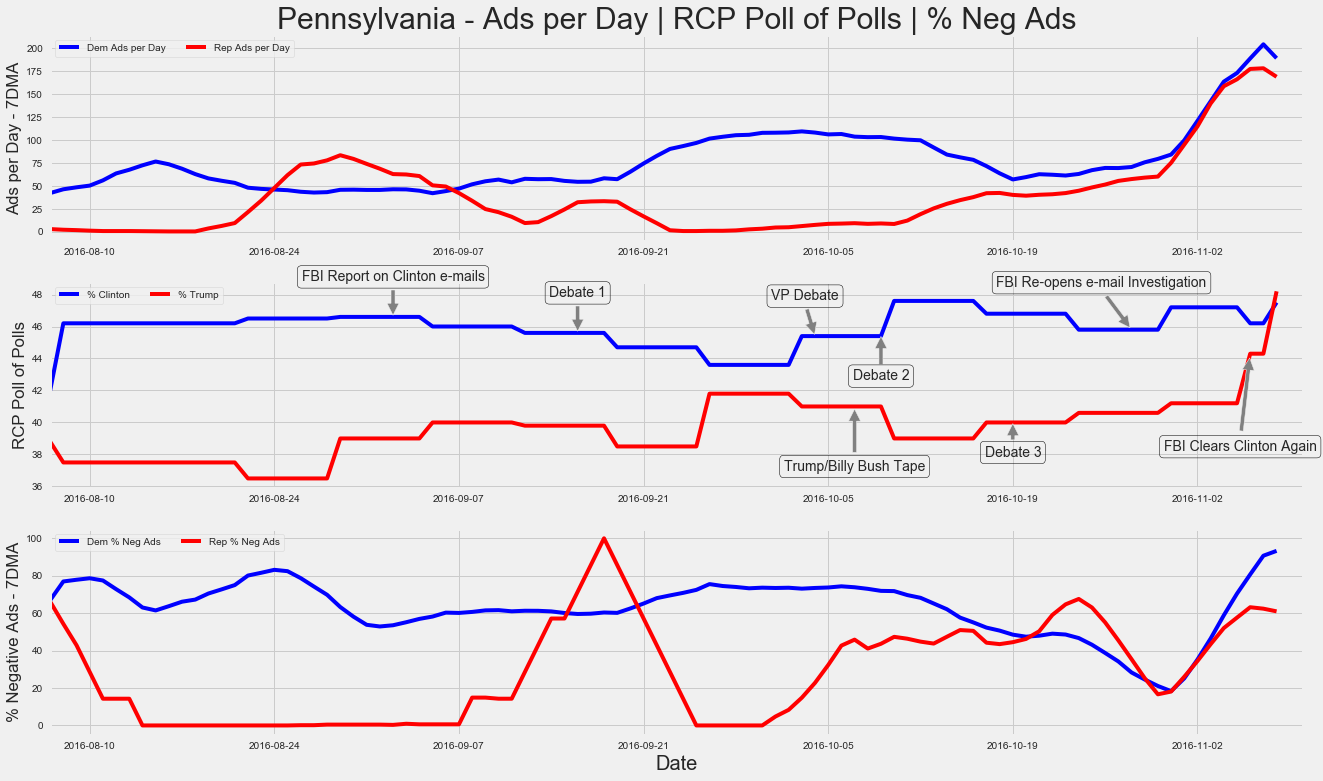

In [35]:
# Pennsylvania Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['PA_D'].index, state_combo['PA_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['PA_R'].index, state_combo['PA_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 7), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')
#plt.setp(ax[0].get_xticklabels(), visible=False) # removes the xlabels from this axis (upper)

ax[1].plot(state_combo['PA_Clinton'].index, state_combo['PA_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['PA_Trump'].index, state_combo['PA_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 7), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['PA_D_neg_ratio'].index, state_comb2['PA_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['PA_R_neg_ratio'].index, state_comb2['PA_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 7), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['PA_Clinton']['2016-9-2'],
                                             state_combo['PA_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['PA_Clinton']['2016-9-16'],
                                              state_combo['PA_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['PA_Clinton']['2016-10-4'],
                                              state_combo['PA_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['PA_Clinton']['2016-10-7'],
                                              state_combo['PA_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -60),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['PA_Clinton']['2016-10-9'],
                                              state_combo['PA_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['PA_Clinton']['2016-10-19'],
                                               state_combo['PA_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['PA_Clinton']['2016-10-28'],
                                               state_combo['PA_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-30, 40),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['PA_Clinton']['2016-11-6'],
                                              state_combo['PA_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -100),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2) # this automatically places
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('Pennsylvania - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/pennsylvania.png')

## New Hampshire

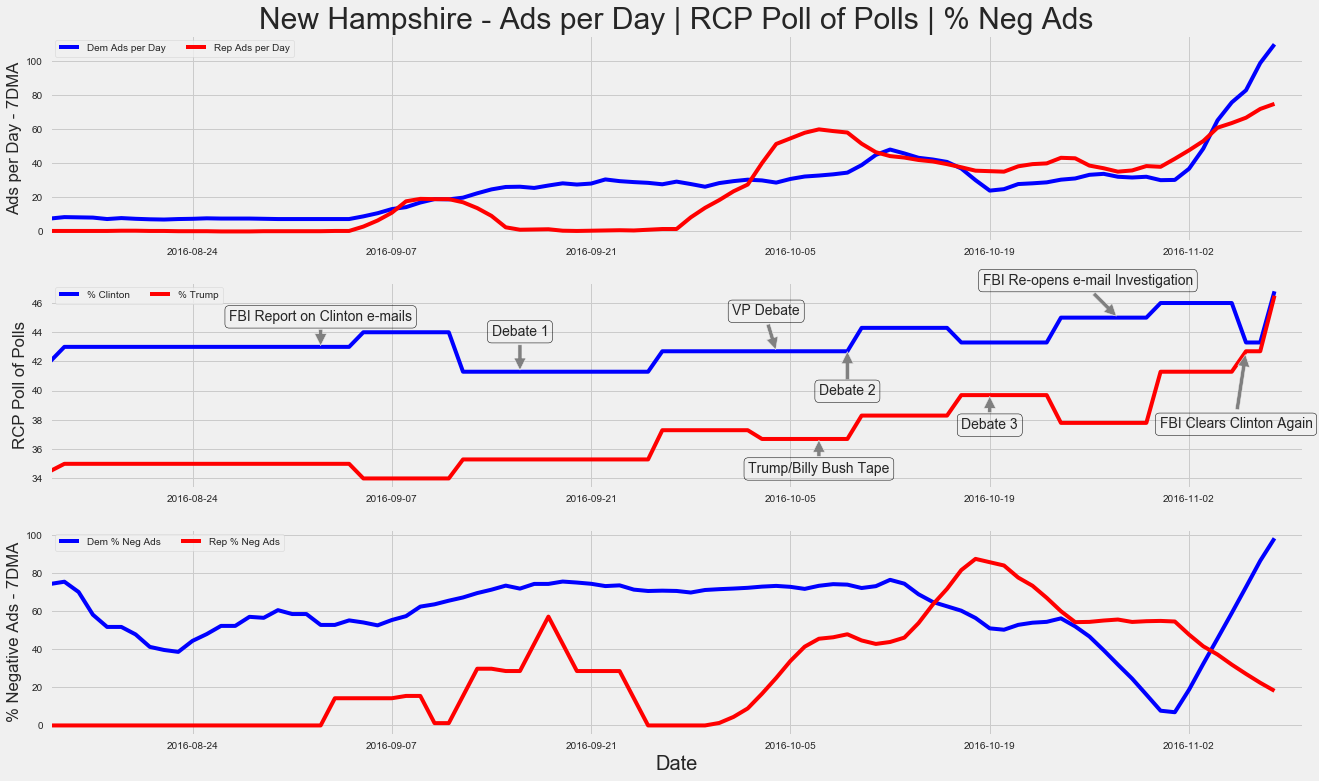

In [37]:
# New Hampshire Plots

fig, ax = plt.subplots(3, figsize=(20, 12))

ax[0].plot(state_combo['NH_D'].index, state_combo['NH_D'].values, 'b', label='Dem Ads per Day')
ax[0].plot(state_combo['NH_R'].index, state_combo['NH_R'].values, 'r', label='Rep Ads per Day')
ax[0].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[0].set_ylabel('Ads per Day - 7DMA')
#plt.setp(ax[0].get_xticklabels(), visible=False) # removes the xlabels from this axis (upper)

ax[1].plot(state_combo['NH_Clinton'].index, state_combo['NH_Clinton'].values, 'b', label='% Clinton')
ax[1].plot(state_combo['NH_Trump'].index, state_combo['NH_Trump'].values, 'r', label='% Trump')
ax[1].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make same as above
ax[1].set_ylabel('RCP Poll of Polls')

ax[2].plot(state_comb2['NH_D_neg_ratio'].index, state_comb2['NH_D_neg_ratio'].values, 'b', label='Dem % Neg Ads')
ax[2].plot(state_comb2['NH_R_neg_ratio'].index, state_comb2['NH_R_neg_ratio'].values, 'r', label='Rep % Neg Ads')
ax[2].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10)) # make start date where no NaNs
ax[2].set_ylabel('% Negative Ads - 7DMA')
ax[2].set_xlabel('Date', fontsize=20)

# Annotations of Key Dates

ax[1].annotate('FBI Report on Clinton e-mails', 
               xy=(datetime(2016, 9, 2), max(state_combo['NH_Clinton']['2016-9-2'],
                                             state_combo['NH_Trump']['2016-9-2'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 1', 
               xy=(datetime(2016, 9, 16), max(state_combo['NH_Clinton']['2016-9-16'],
                                              state_combo['NH_Trump']['2016-9-16'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('VP Debate', 
               xy=(datetime(2016, 10, 4), max(state_combo['NH_Clinton']['2016-10-4'],
                                              state_combo['NH_Trump']['2016-10-4'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, 40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Trump/Billy Bush Tape', 
               xy=(datetime(2016, 10, 7), min(state_combo['NH_Clinton']['2016-10-7'],
                                              state_combo['NH_Trump']['2016-10-7'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('Debate 2', 
               xy=(datetime(2016, 10, 9), max(state_combo['NH_Clinton']['2016-10-9'],
                                              state_combo['NH_Trump']['2016-10-9'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -40),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.01))

ax[1].annotate('Debate 3', 
               xy=(datetime(2016, 10, 19), min(state_combo['NH_Clinton']['2016-10-19'],
                                               state_combo['NH_Trump']['2016-10-19'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(0, -30),
               textcoords='offset points', ha='center', va='center', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Re-opens e-mail Investigation', 
               xy=(datetime(2016, 10, 28), max(state_combo['NH_Clinton']['2016-10-28'],
                                               state_combo['NH_Trump']['2016-10-28'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-30, 30),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

ax[1].annotate('FBI Clears Clinton Again', 
               xy=(datetime(2016, 11, 6), min(state_combo['NH_Clinton']['2016-11-6'],
                                              state_combo['NH_Trump']['2016-11-6'])),
               xycoords='data',
               bbox=dict(boxstyle="round", fc="none", ec="black"),
               xytext=(-10, -80),
               textcoords='offset points', ha='center', va='bottom', arrowprops=dict(facecolor='gray',
                                                                                    shrink=0.05))

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2) # this automatically places
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='best', ncol=2)

# plot title
ax[0].set_title('New Hampshire - Ads per Day | RCP Poll of Polls | % Neg Ads', fontsize=30)

# saving picture to file
# plt.savefig('nv_revised_pics/new_hampshire.png')